In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Read CSV file into DataFrame
csv_file = './reviews_airbnb.csv'
df = pd.read_csv(csv_file)

print(f'Termino la carga del archivo y tiene {len(df)} filas')






Termino la carga del archivo y tiene 755607 filas


In [10]:
# Group reviewers by hosts
host_reviewers = {}
for _, row in df.iterrows():
    host = row['listing_id']
    reviewer_id = row['reviewer_id']
    
    # Update the dictionary with the reviewers for the current host
    if host not in host_reviewers:
        host_reviewers[host] = set()
    host_reviewers[host].add(reviewer_id)

print(f'Hay {len(host_reviewers.keys())} airbnb')

hosts_to_exclude = []

# Eliminar hosts que tenga menos de 50 reviews
for host, reviews in host_reviewers.items():
    if len(reviews) < 50:
        hosts_to_exclude.append(host)

for host in hosts_to_exclude:
    del host_reviewers[host]

print(f'Luego del filtrado hay {len(host_reviewers.keys())} airbnb')

Hay 27389 airbnb
Luego del filtrado hay 4203 airbnb


In [11]:


# Create an undirected graph
G = nx.Graph()
rows = []

# Iterate through the hosts and their reviewers
for host1, reviewers1 in host_reviewers.items():
    for host2, reviewers2 in host_reviewers.items():
        if host1 != host2:
            # Calculate the number of shared reviewers between the two hosts
            shared_reviewers = len(reviewers1.intersection(reviewers2))
            if shared_reviewers > 0:
                # Add an edge between the hosts with the weight equal to the number of shared reviewers
                G.add_edge(host1, host2, weight=shared_reviewers)
                rows.append((host1, host2, shared_reviewers))

In [12]:
import csv

# Escribir las filas en un archivo CSV
with open('host_host.csv', 'w', newline='') as archivo_csv:
    escritor_csv = csv.writer(archivo_csv)
    escritor_csv.writerow(['HostSource', 'HostTarget', 'Weight'])  # Escribir encabezados
    escritor_csv.writerows(rows)  # Escribir las filas

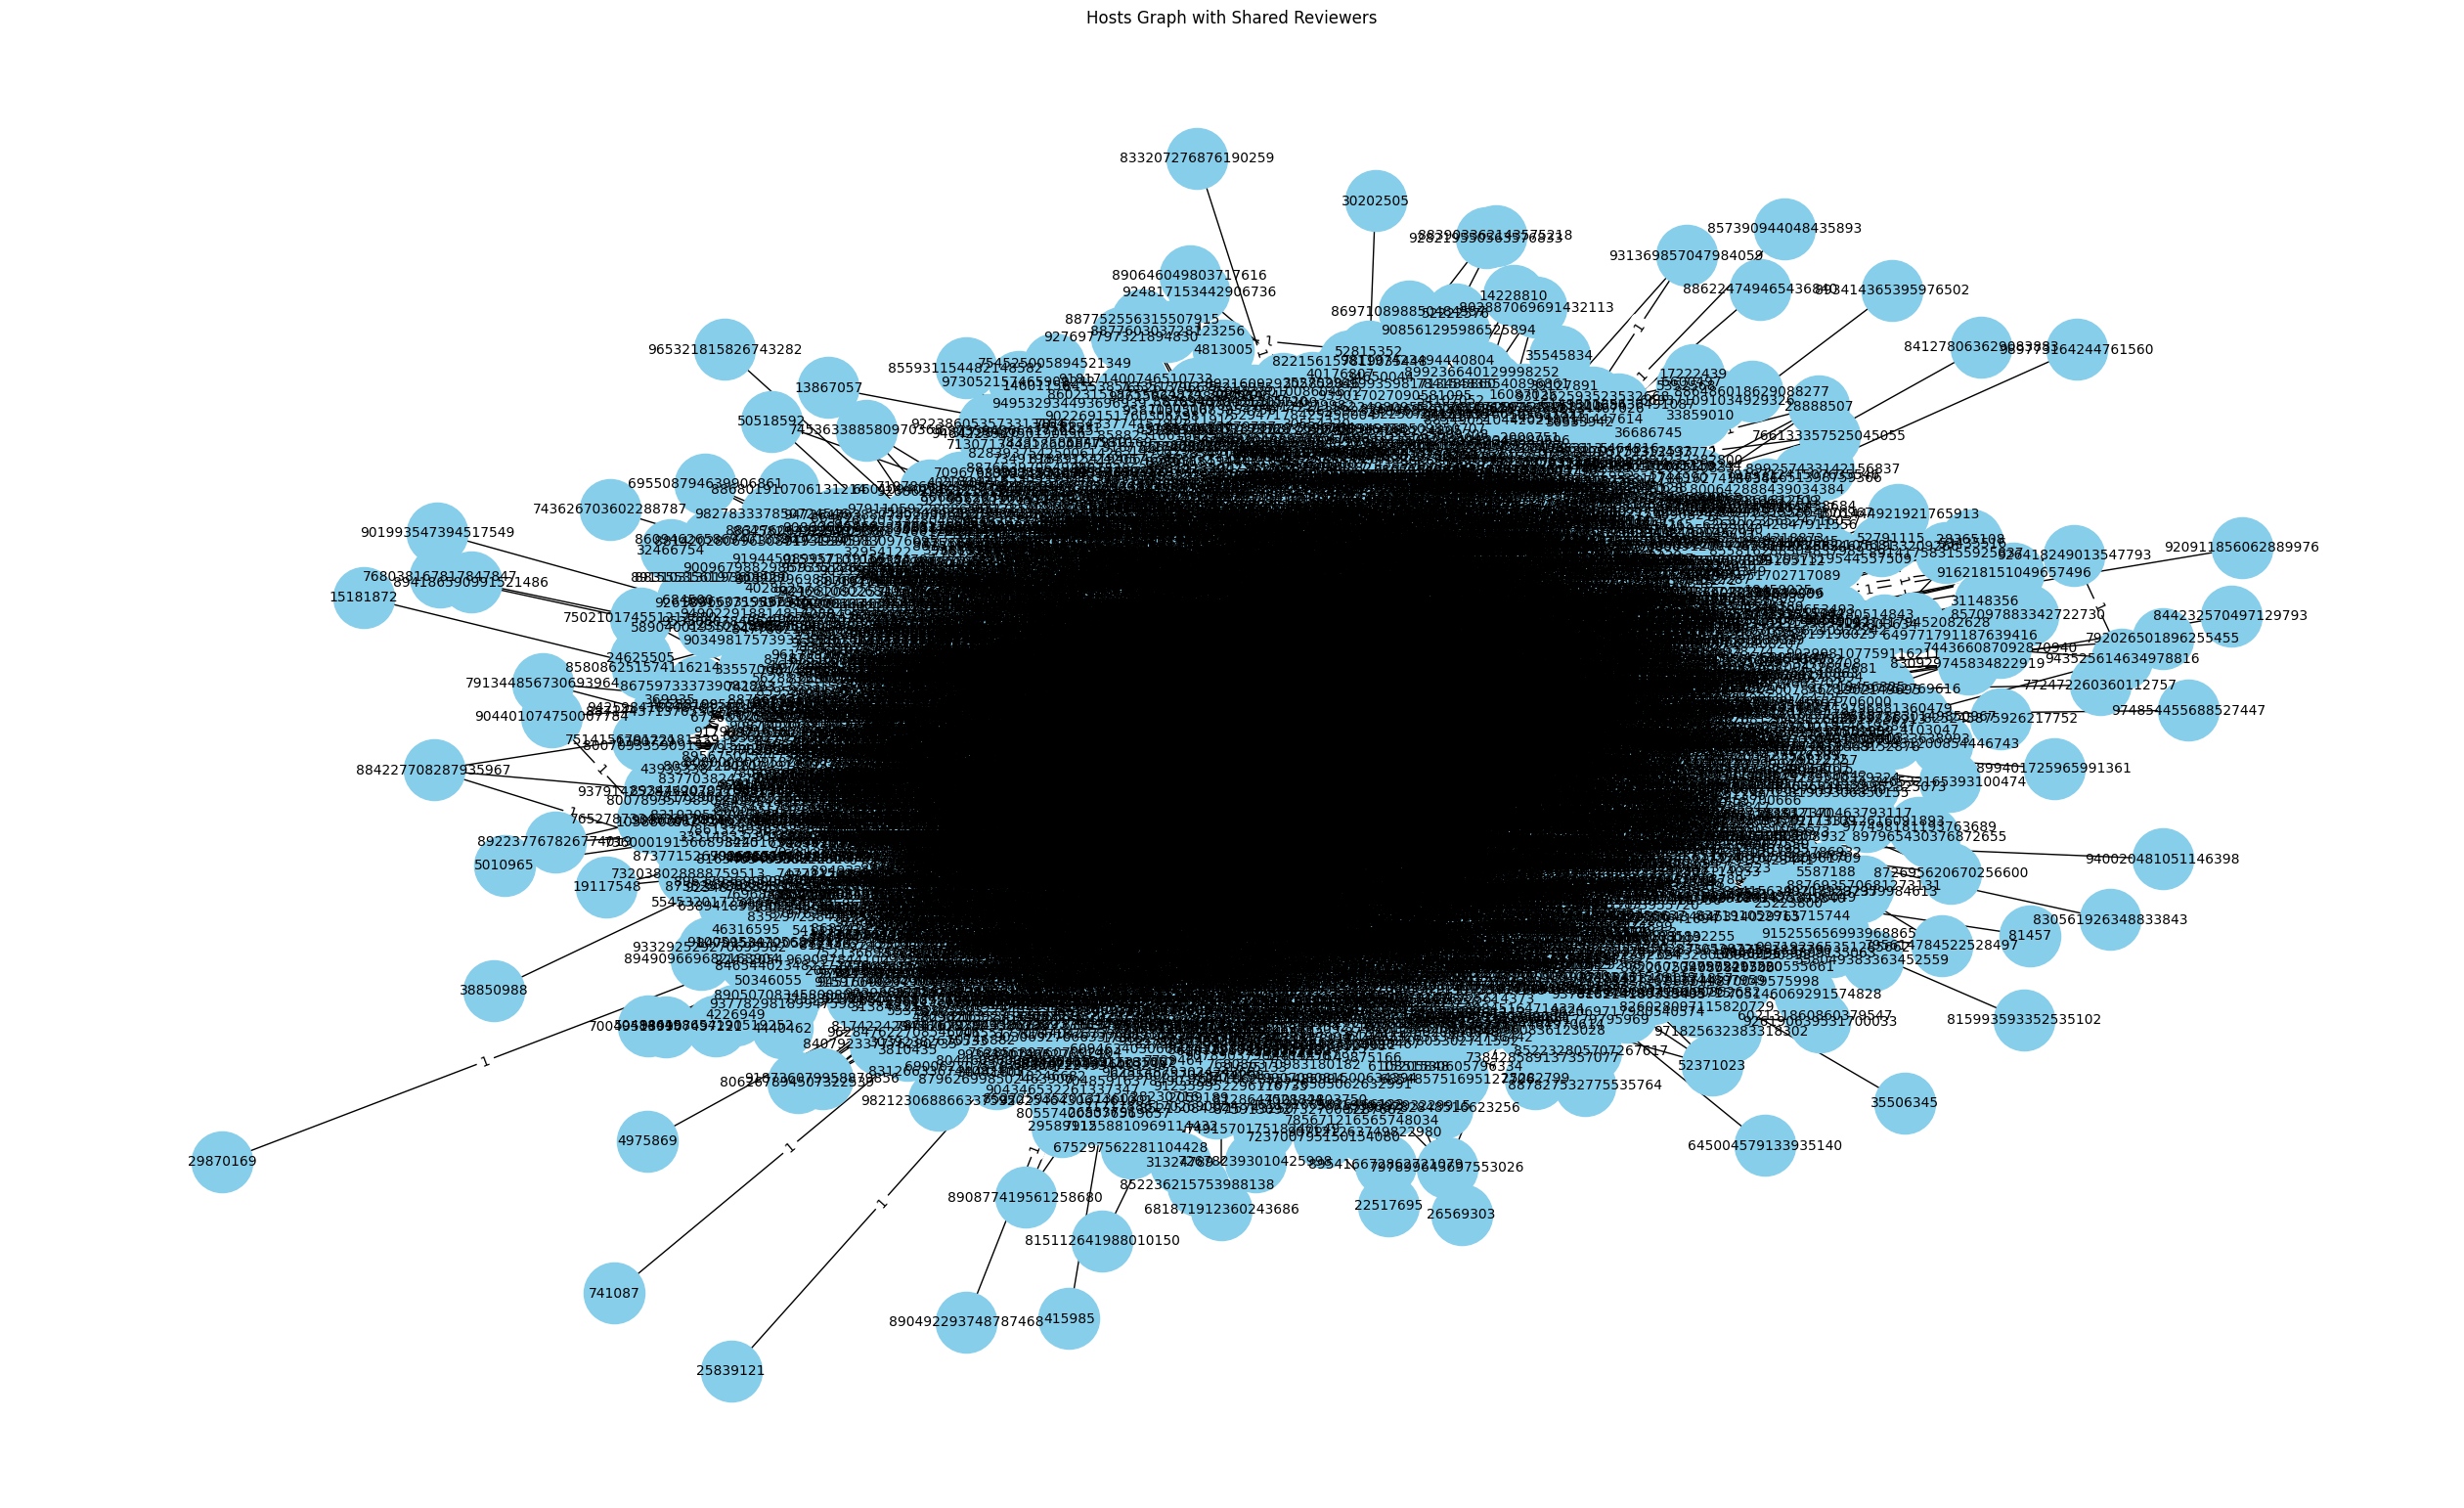

In [7]:
# Plot the graph
plt.figure(figsize=(25, 15))
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10)
# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Hosts Graph with Shared Reviewers')
plt.show()
